# Rheology Examples #

In [1]:
import gdmate as gd
import matplotlib.pyplot as plt


### Calculate Conductive Geotherm ###

The function `cond_geotherm` calculates the conductive temperatures at a series of depths based on the model from Chapman 1986. In the calculations, the lithosphere is treated as a sequence of discrete layers with varying thicknesses and radiogenic heat production. Users can choose the thicknesses of the lithosphere layers, the maximum depth of the model, and several additional physical properties of the lithosphere. This function returns an array containing the conductive temperatures at 1000 m intervals, along with several other arrays containing relevant values.

Note that all input and output arrays are ordered starting from values closest to the surface and ending with values at the greatest depth.

If you pass nothing to `cond_geotherm`, it will run using its default parameters (e.g, `thicknesses` = [20, 20, 60], `depth` = 600 km):

In [2]:
# Running cond_geotherm
cond_boundary_temps, cond_boundary_heat_flows, z, cond_temps = gd.rheology.cond_geotherm()

# Printing the first 3 results from cond_geotherm
print("Temperatures at layer boundaries:")
print(cond_boundary_temps)
print("Heat flows at layer boundaries:")
print(cond_boundary_heat_flows)
print("Array of depths: ")
print(z)

Temperatures at layer boundaries:
[ 273.    616.68  860.36 1531.4 ]
Heat flows at layer boundaries:
[0.05296 0.03296 0.02796 0.02796]
Array of depths: 
[     0   1000   2000   3000   4000   5000   6000   7000   8000   9000
  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000
  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000
  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000
  40000  41000  42000  43000  44000  45000  46000  47000  48000  49000
  50000  51000  52000  53000  54000  55000  56000  57000  58000  59000
  60000  61000  62000  63000  64000  65000  66000  67000  68000  69000
  70000  71000  72000  73000  74000  75000  76000  77000  78000  79000
  80000  81000  82000  83000  84000  85000  86000  87000  88000  89000
  90000  91000  92000  93000  94000  95000  96000  97000  98000  99000
 100000 101000 102000 103000 104000 105000 106000 107000 108000 109000
 110000 111000 112000 113000 114000 115000 116000 117000 118000 119

In [3]:
# Printing the final piece of output from cond_geotherm
print("Conductive temperatures at each depth:")
print(cond_temps)

Conductive temperatures at each depth:
[ 273.     293.984  314.568  334.752  354.536  373.92   392.904  411.488
  429.672  447.456  464.84   481.824  498.408  514.592  530.376  545.76
  560.744  575.328  589.512  603.296  616.68   629.814  642.848  655.782
  668.616  681.35   693.984  706.518  718.952  731.286  743.52   755.654
  767.688  779.622  791.456  803.19   814.824  826.358  837.792  849.126
  860.36   871.544  882.728  893.912  905.096  916.28   927.464  938.648
  949.832  961.016  972.2    983.384  994.568 1005.752 1016.936 1028.12
 1039.304 1050.488 1061.672 1072.856 1084.04  1095.224 1106.408 1117.592
 1128.776 1139.96  1151.144 1162.328 1173.512 1184.696 1195.88  1207.064
 1218.248 1229.432 1240.616 1251.8   1262.984 1274.168 1285.352 1296.536
 1307.72  1318.904 1330.088 1341.272 1352.456 1363.64  1374.824 1386.008
 1397.192 1408.376 1419.56  1430.744 1441.928 1453.112 1464.296 1475.48
 1486.664 1497.848 1509.032 1520.216 1531.4   1531.4   1531.4   1531.4
 1531.4   1531.4 

As seen above, the arrays z and cond_temps can easily get very long. It can be helpful to visualize the data from `cond_geotherm` by graphing it:

Text(0, 0.5, 'Depth (km)')

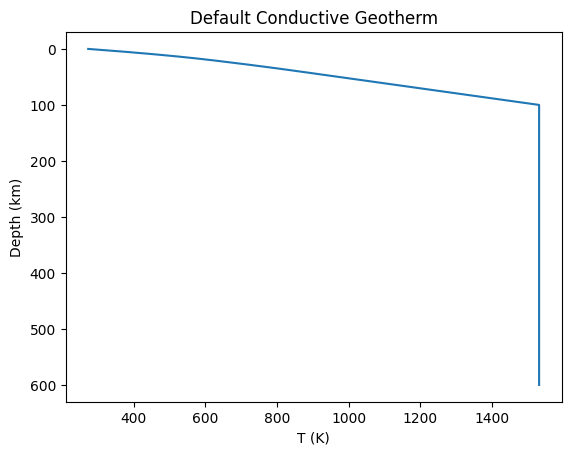

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cond_temps, z / 1000)
ax.invert_yaxis()
ax.set_title("Default Conductive Geotherm")
ax.set_xlabel('T (K)')
ax.set_ylabel('Depth (km)')

Notably, when `cond_geotherm` extends beyond the depth of the lithosphere (i.e, beyond the last layer in `thicknesses`), the temperature of the asthenosphere is made constant. To actually calculate the temperatures at all depths, we'll need to use the function `geotherm`. However, if we only want the temperatures for the lithosphere, we can rerun `cond_geotherm` on a shallower depth to avoid dealing with the unnecessary values at the end of the `z` and `cond_temps` arrays:

In [5]:
# Rerun cond_geotherm with a non-default depth
lith_boundary_temps, lith_boundary_heat_flows, lith_z, lith_cond_temps = gd.rheology.cond_geotherm(depth=100)

# Printing the first 3 return values
print("Temperatures at layer boundaries:")
print(lith_boundary_temps)
print("Heat flows at layer boundaries:")
print(lith_boundary_heat_flows)
print("Array of depths: ")
print(lith_z)

Temperatures at layer boundaries:
[ 273.    616.68  860.36 1531.4 ]
Heat flows at layer boundaries:
[0.05296 0.03296 0.02796 0.02796]
Array of depths: 
[     0   1000   2000   3000   4000   5000   6000   7000   8000   9000
  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000
  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000
  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000
  40000  41000  42000  43000  44000  45000  46000  47000  48000  49000
  50000  51000  52000  53000  54000  55000  56000  57000  58000  59000
  60000  61000  62000  63000  64000  65000  66000  67000  68000  69000
  70000  71000  72000  73000  74000  75000  76000  77000  78000  79000
  80000  81000  82000  83000  84000  85000  86000  87000  88000  89000
  90000  91000  92000  93000  94000  95000  96000  97000  98000  99000
 100000]


In [6]:
# Printing the calculated temperatures

print("Array of temperatures: ")
print(lith_cond_temps)

Array of temperatures: 
[ 273.     293.984  314.568  334.752  354.536  373.92   392.904  411.488
  429.672  447.456  464.84   481.824  498.408  514.592  530.376  545.76
  560.744  575.328  589.512  603.296  616.68   629.814  642.848  655.782
  668.616  681.35   693.984  706.518  718.952  731.286  743.52   755.654
  767.688  779.622  791.456  803.19   814.824  826.358  837.792  849.126
  860.36   871.544  882.728  893.912  905.096  916.28   927.464  938.648
  949.832  961.016  972.2    983.384  994.568 1005.752 1016.936 1028.12
 1039.304 1050.488 1061.672 1072.856 1084.04  1095.224 1106.408 1117.592
 1128.776 1139.96  1151.144 1162.328 1173.512 1184.696 1195.88  1207.064
 1218.248 1229.432 1240.616 1251.8   1262.984 1274.168 1285.352 1296.536
 1307.72  1318.904 1330.088 1341.272 1352.456 1363.64  1374.824 1386.008
 1397.192 1408.376 1419.56  1430.744 1441.928 1453.112 1464.296 1475.48
 1486.664 1497.848 1509.032 1520.216 1531.4  ]


Since the layer thicknesses and radiogenic heat productions remain unchanged, the temperatures and heat flows at layer boundaries remain the same. However, now that the maximum depth is only 100 km, `z` and `cond_temps` are much shorter, and `cond_temps` no longer contains duplicate values at the end.

Now, let's graph the new lithospheric geotherm to confirm that the model ran properly:

Text(0, 0.5, 'Depth (km)')

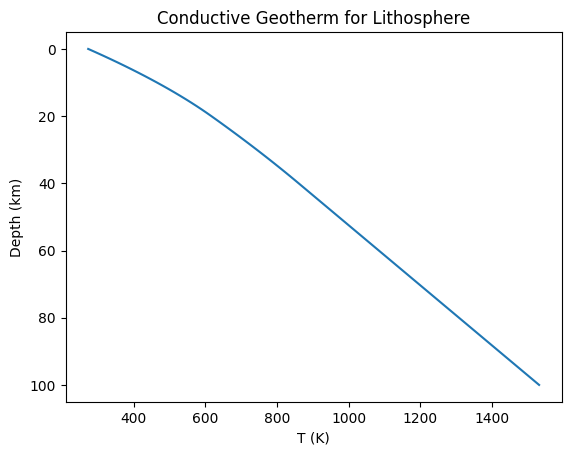

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lith_cond_temps, lith_z / 1000)
ax.invert_yaxis()
ax.set_title("Conductive Geotherm for Lithosphere")
ax.set_xlabel('T (K)')
ax.set_ylabel('Depth (km)')

As expected, this graph looks fairly reasonable and has a much smaller range of depths.

### Calculate Combined Geotherm ###

Although we can get a conductive geotherm from `cond_geotherm`, it is often useful to have a combined adiabatic and conductive geotherm that works for both the lithosphere and the asthenosphere. To do this, we can use the function `geotherm`, which produces the combined adiabatic and conductive temperatures at 1 km intervals.


A couple of notes about `geotherm`:

- `geotherm` takes the same parameters as `cond_geotherm`, in addition to several other parameters used for calculating the adiabatic geotherm.

- By default, `geotherm` will plot the resulting geotherm and save the calculated boundary temperatures and heat flows to a separate csv file. To disable these features, you can set `plot` and `save` to `False`.


- `geotherm` also separately prints out information about the model's calculated boundary conditions, which can be used to get an initial idea of whether the inputted parameters are producing a reasonable model.

Let's run an example of `geotherm` with the default parameters (although we'll set `save` to False):

Conductive Boundary Temperatures:  [ 273.    616.68  860.36 1531.4 ]
Conductive Boundary Heat Flows:  [0.05296 0.03296 0.02796 0.02796]
LAB Depth       =  100 km
LAB Temperature =  1573.0871180382965 K
Bottom Temperature =  1798.691710348502 K


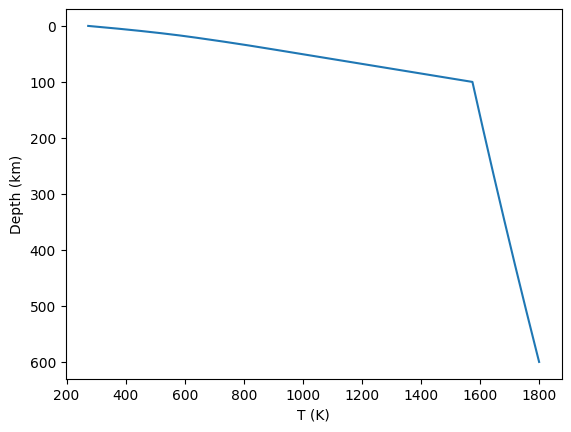

In [8]:
# Note that geotherm returns several values aside from the 
# combined adiabatic and conductive temperatures
comb_boundary_temps, comb_boundary_heat_flows, z, comb_temps, new_cond_temps, adiab_temps = gd.rheology.geotherm(save=False)

The printed data all looks reasonable, which is good news.

As for the graph, the geotherm for the lithosphere looks very similar to the geotherm calculated previously using `cond_geotherm`, but now we are also predicting more accurate temperatures for the asthenosphere. 

For more information about any of these functions, please consult the documentation at http://gdmate.readthedocs.io.